In [43]:
#data_city

#Account: TMRW Tech Hub
#Property: TMRW
#View: All Web Site Data
#ids: ga:123303369
#start-date: 2017-02-01
#end-date: 2017-04-30

#metrics
#ga:sessions
#ga:bounceRate
#ga:goal1ConversionRate
#ga:goal1Completions

#dimensions
#ga:city

#filter
#ga:sessions>30;ga:city!=(not set)

In [44]:
import json
from pprint import pprint

with open('data/TMRW_user_groups.json') as file: 
    data_city = json.load(file)

data_city = data_city['reports'][0]['data']['rows']
data_city
pprint(data_city)

[{'dimensions': ['Croydon', '18-24'],
  'metrics': [{'values': ['101',
                          '41.584158415841586',
                          '4',
                          '3.9603960396039604']}]},
 {'dimensions': ['Croydon', '25-34'],
  'metrics': [{'values': ['334',
                          '47.90419161676647',
                          '17',
                          '5.089820359281437']}]},
 {'dimensions': ['Croydon', '35-44'],
  'metrics': [{'values': ['223',
                          '43.04932735426009',
                          '7',
                          '3.1390134529147984']}]},
 {'dimensions': ['Croydon', '45-54'],
  'metrics': [{'values': ['90',
                          '45.55555555555556',
                          '2',
                          '2.2222222222222223']}]},
 {'dimensions': ['Croydon', '55-64'],
  'metrics': [{'values': ['32', '53.125', '1', '3.125']}]},
 {'dimensions': ['London', '18-24'],
  'metrics': [{'values': ['167',
                          '4

In [45]:
def create_dict(x):
    city_dict = {}

    for s in x:
        
        city_dict[s['dimensions'][0],s['dimensions'][1]] = (s['metrics'][0]['values'][0],s['metrics'][0]['values'][1],s['metrics'][0]['values'][2],s['metrics'][0]['values'][3])
        
    
    return city_dict
        

city_dict = (create_dict(data_city))
pprint(city_dict)


{('Croydon', '18-24'): ('101', '41.584158415841586', '4', '3.9603960396039604'),
 ('Croydon', '25-34'): ('334', '47.90419161676647', '17', '5.089820359281437'),
 ('Croydon', '35-44'): ('223', '43.04932735426009', '7', '3.1390134529147984'),
 ('Croydon', '45-54'): ('90', '45.55555555555556', '2', '2.2222222222222223'),
 ('Croydon', '55-64'): ('32', '53.125', '1', '3.125'),
 ('London', '18-24'): ('167', '49.700598802395206', '8', '4.790419161676647'),
 ('London', '25-34'): ('842', '59.14489311163895', '24', '2.8503562945368173'),
 ('London', '35-44'): ('482', '54.77178423236515', '14', '2.904564315352697'),
 ('London', '45-54'): ('205', '55.60975609756098', '3', '1.4634146341463417'),
 ('London', '55-64'): ('37', '48.64864864864865', '0', '0.0')}


In [46]:
import pandas as pd

data = pd.read_csv("data/TMRW_users.csv")
data = data[data.City_Age!="(not set)"]
data = data[data.Sessions>30]
data = data[data.Goal1Completions>0]
data

,City_Age,Sessions,BounceRate,Goal1Completions,Goal1ConversionRate
1,London 45-54,165,53.939,2,1.212
2,Croydon 45-54,82,48.780,1,1.220
3,London 35-44,426,53.756,12,2.817
4,London 25-34,758,59.235,22,2.902
5,Croydon 35-44,204,43.137,6,2.941
6,Croydon 55-64,31,51.613,1,3.226
7,Croydon 18-24,86,43.023,3,3.488
8,Croydon 25-34,299,47.157,15,5.017
9,London 18-24,155,51.613,8,5.161


In [47]:
samples1 = [[data.Sessions[1],data.BounceRate[1],data.Goal1Completions[1],data.Goal1ConversionRate[1]],[data.Sessions[2],data.BounceRate[2],data.Goal1Completions[2],data.Goal1ConversionRate[2]],[data.Sessions[3],data.BounceRate[3],data.Goal1Completions[3],data.Goal1ConversionRate[3]],[data.Sessions[4],data.BounceRate[4],data.Goal1Completions[4],data.Goal1ConversionRate[4]],[data.Sessions[5],data.BounceRate[5],data.Goal1Completions[5],data.Goal1ConversionRate[5]],[data.Sessions[6],data.BounceRate[6],data.Goal1Completions[6],data.Goal1ConversionRate[6]],[data.Sessions[7],data.BounceRate[7],data.Goal1Completions[7],data.Goal1ConversionRate[7]]]
samples1

[[165, 53.938999999999993, 2, 1.212],
 [82, 48.780000000000001, 1, 1.22],
 [426, 53.756, 12, 2.8169999999999997],
 [758, 59.234999999999999, 22, 2.9019999999999997],
 [204, 43.137, 6, 2.9410000000000003],
 [31, 51.613, 1, 3.2260000000000004],
 [86, 43.023000000000003, 3, 3.488]]

In [48]:
import math

a = math.pow(2,3)
a

8.0

In [49]:
import random
import math

NUM_CLUSTERS = 2
TOTAL_DATA = 7
LOWEST_SAMPLE_POINT = 5 #element 0 of SAMPLES.
HIGHEST_SAMPLE_POINT = 3 #element 3 of SAMPLES.
BIG_NUMBER = math.pow(10, 10)


SAMPLES = samples1
data1 = []
centroids = []

class DataPoint:
    def __init__(self, x, y, z, f):
        self.x = x
        self.y = y
        self.z = z
        self.f = f
    
    def set_x(self, x):
        self.x = x
    
    def get_x(self):
        return self.x
    
    def set_y(self, y):
        self.y = y
    
    def get_y(self):
        return self.y
    
    def set_z(self, z):
        self.z = z
    
    def get_z(self):
        return self.z
    
    def set_f(self, f):
        self.f = f
    
    def get_f(self):
        return self.f
    
    def set_cluster(self, clusterNumber):
        self.clusterNumber = clusterNumber
    
    def get_cluster(self):
        return self.clusterNumber

class Centroid:
    def __init__(self, x, y, z, f):
        self.x = x
        self.y = y
        self.z = z
        self.f = f
    
    def set_x(self, x):
        self.x = x
    
    def get_x(self):
        return self.x
    
    def set_y(self, y):
        self.y = y
    
    def get_y(self):
        return self.y
    
    def set_z(self, z):
        self.z = z
    
    def get_z(self):
        return self.z
    
    def set_f(self, f):
        self.f = f
    
    def get_f(self):
        return self.f



In [50]:
def initialize_centroids():
    # Set the centoid coordinates to match the data points furthest from each other.
    # In this example, [31, 51.613, 1, 3.2260000000000004] and [758, 59.234999999999999, 22, 2.9019999999999997]
    centroids.append(Centroid(SAMPLES[LOWEST_SAMPLE_POINT][0], SAMPLES[LOWEST_SAMPLE_POINT][1],SAMPLES[LOWEST_SAMPLE_POINT][2],SAMPLES[LOWEST_SAMPLE_POINT][3]))
    centroids.append(Centroid(SAMPLES[HIGHEST_SAMPLE_POINT][0], SAMPLES[HIGHEST_SAMPLE_POINT][1],SAMPLES[HIGHEST_SAMPLE_POINT][2],SAMPLES[HIGHEST_SAMPLE_POINT][3]))
    
    print("Centroids initialized at:")
    print("(", centroids[0].get_x(), ", ", centroids[0].get_y(), ", ", centroids[0].get_z(),  ", ", centroids[0].get_f(),")")
    print("(", centroids[1].get_x(), ", ", centroids[1].get_y(), ", ", centroids[1].get_z(),  ", ", centroids[1].get_f(),")")
    #print("(", centroids[2].get_x(), ", ", centroids[2].get_y(), ", ", centroids[2].get_z(),  ", ", centroids[2].get_f(),")")
    #print("(", centroids[3].get_x(), ", ", centroids[3].get_y(), ", ", centroids[3].get_z(),  ", ", centroids[3].get_f(),")")
    print()
    return

print(initialize_centroids())

Centroids initialized at:
( 31 ,  51.613 ,  1 ,  3.226 )
( 758 ,  59.235 ,  22 ,  2.902 )

None


In [57]:
def initialize_datapoints():
    # DataPoint objects' x and y values are taken from the SAMPLE array.
    # The DataPoints associated with LOWEST_SAMPLE_POINT and HIGHEST_SAMPLE_POINT are initially
    # assigned to the clusters matching the LOWEST_SAMPLE_POINT and HIGHEST_SAMPLE_POINT centroids.
    for i in range(TOTAL_DATA):
        newPoint = DataPoint(SAMPLES[i][0], SAMPLES[i][1], SAMPLES[i][2], SAMPLES[i][3])
        
        if(i == LOWEST_SAMPLE_POINT):
            newPoint.set_cluster(0)
        elif(i == HIGHEST_SAMPLE_POINT):
            newPoint.set_cluster(1)
        else:
            newPoint.set_cluster(None)
            
        data1.append(newPoint)
    
    return

In [61]:
def get_distance(dataPointX, dataPointY, dataPointZ, dataPointF, centroidX, centroidY, centroidZ, centroidF):
    # Calculate Euclidean distance.
    return math.sqrt(math.pow((centroidY - dataPointY), 2) + math.pow((centroidX - dataPointX), 2) /
                     + math.pow((centroidZ - dataPointZ), 2) + math.pow((centroidF - dataPointF), 2))


In [69]:
def recalculate_centroids():
    totalX = 0
    totalY = 0
    totalZ = 0
    totalF = 0
    totalInCluster = 0
    
    for j in range(NUM_CLUSTERS):
        for k in range(len(data1)):
            if(data1[k].get_cluster() == j):
                totalX += data1[k].get_x()
                totalY += data1[k].get_y()
                totalZ += data1[k].get_z()
                totalF += data1[k].get_f()
                totalInCluster += 1
        
        if(totalInCluster > 0):
            centroids[j].set_x(totalX / totalInCluster)
            centroids[j].set_y(totalY / totalInCluster)
            centroids[j].set_z(totalX / totalInCluster)
            centroids[j].set_f(totalY / totalInCluster)
    
    return

In [70]:
def update_clusters():
    isStillMoving = 0
    
    for i in range(TOTAL_DATA):
        bestMinimum = BIG_NUMBER
        currentCluster = 0
        
        for j in range(NUM_CLUSTERS):
            distance = get_distance(data1[i].get_x(), data1[i].get_y(), data1[i].get_z(), data1[i].get_f(),
                                    centroids[j].get_x(), centroids[j].get_y(), centroids[j].get_z(), centroids[j].get_f())
            if(distance < bestMinimum):
                bestMinimum = distance
                currentCluster = j
        
        data[i].set_cluster(currentCluster)
        
        if(data1[i].get_cluster() is None or data1[i].get_cluster() != currentCluster):
            data1[i].set_cluster(currentCluster)
            isStillMoving = 1
    
    return isStillMoving

In [71]:
def perform_kmeans():
    isStillMoving = 1
    
    initialize_centroids()
    
    initialize_datapoints()
    
    while(isStillMoving):
        recalculate_centroids()
        isStillMoving = update_clusters()
    
    return

In [72]:
def print_results():
    for i in range(NUM_CLUSTERS):
        print("Cluster ", i, " includes:")
        for j in range(TOTAL_DATA):
            if(data1[j].get_cluster() == i):
                print("(", data1[j].get_x(), ", ", data1[j].get_y(), ", ", data1[j].get_z(), ", ", data1[j].get_f(), ")")
        print()
    
    return

#perform_kmeans()
#print_results()

In [28]:
SAMPLES2 = [[5,4],[3,2]]
LOWEST_SAMPLE_POINT2=2
a = SAMPLES2[LOWEST_SAMPLE_POINT2][0]
a

IndexError: list index out of range

In [29]:
from scipy.cluster.hierarchy import *
from scipy.spatial.distance import pdist

In [33]:
# Для оценки качества кластеров как смеси распределений
from sklearn import mixture

# Анализа главных компонент
from sklearn.decomposition import PCA 

# Линейный дискриминантный анализ
from sklearn.lda import LDA


# Для загрузки данных из xls документа
import pandas as pd

# Для отрисовки графиков
from pylab import *

In [36]:
data = pd.read_csv("data/TMRW_users.csv")
data = data[data.City_Age!="(not set)"]
data = data[data.Sessions>30]
data = data[data.Goal1Completions>0]
data

,City_Age,Sessions,BounceRate,Goal1Completions,Goal1ConversionRate
1,London 45-54,165,53.939,2,1.212
2,Croydon 45-54,82,48.780,1,1.220
3,London 35-44,426,53.756,12,2.817
4,London 25-34,758,59.235,22,2.902
5,Croydon 35-44,204,43.137,6,2.941
6,Croydon 55-64,31,51.613,1,3.226
7,Croydon 18-24,86,43.023,3,3.488
8,Croydon 25-34,299,47.157,15,5.017
9,London 18-24,155,51.613,8,5.161


In [173]:
data_for_clust = data.ix[:,2:].as_matrix()
data_for_clust

array([[ 165.   ,   53.939,    2.   ,    1.212],
       [  82.   ,   48.78 ,    1.   ,    1.22 ],
       [ 426.   ,   53.756,   12.   ,    2.817],
       [ 758.   ,   59.235,   22.   ,    2.902],
       [ 204.   ,   43.137,    6.   ,    2.941],
       [  31.   ,   51.613,    1.   ,    3.226],
       [  86.   ,   43.023,    3.   ,    3.488],
       [ 299.   ,   47.157,   15.   ,    5.017],
       [ 155.   ,   51.613,    8.   ,    5.161]])

In [174]:
data_dist = pdist(data_for_clust, 'euclidean')
data_dist

array([  83.16619112,  261.19649598,  593.36321399,   40.70224373,
        134.03904831,   79.78934285,  134.85352628,   12.5301587 ,
        344.21550079,  676.40900064,  122.24485793,   51.11800001,
          7.63458401,  217.49034769,   73.49528808,  332.19576558,
        222.33483429,  395.15915747,  340.28906466,  127.22573168,
        271.04812633,  554.4647393 ,  727.34324762,  672.46425358,
        459.21710694,  603.2148854 ,  173.27990016,  118.0394519 ,
         95.53256082,   49.81737625,   55.70329204,  268.40838962,
        124.21249625,  213.38328847,   69.73225243,  144.23895685])

In [175]:
data_linkage = linkage(data_dist, method='average')
data_linkage

array([[   1.        ,    6.        ,    7.63458401,    2.        ],
       [   0.        ,    8.        ,   12.5301587 ,    2.        ],
       [   4.        ,   10.        ,   45.25980999,    3.        ],
       [   5.        ,    9.        ,   53.41064602,    3.        ],
       [  11.        ,   12.        ,  108.66653656,    6.        ],
       [   2.        ,    7.        ,  127.22573168,    2.        ],
       [  13.        ,   14.        ,  242.3458541 ,    8.        ],
       [   3.        ,   15.        ,  577.33402663,    9.        ]])

In [176]:
def wgss(data, groups):

    _data = np.array(data)
    res = 0.0
    for cluster in groups:
        inclust = _data[np.array(groups) == cluster]
        meanval = np.mean(inclust, axis=0)
        res += np.sum((inclust - meanval) ** 2)
    return res

print(wgss)

<function wgss at 0x0F726030>


In [177]:
elbow = [np.nan, wgss(data_for_clust, [1]*len(data_for_clust[:,1]))]
for k in range(2, 10):
    groups = fcluster(data_linkage, k, criterion='maxclust')
    elbow.append(wgss(data_for_clust, groups))

fig = figure()
ax = fig.add_subplot('121')
elbow = np.array(elbow)
ax.plot(elbow/np.nanmax(elbow),'o', ls='solid')
ax.set_xlim([0, 10])
ax.set_ylim([0, 1.2])
ax.set_title(u'Сумма внутригрупповых вариаций')
ax.set_xlabel(u'Число кластеров')

ax1 = fig.add_subplot('122') 

ax1.plot((elbow[1]-elbow)/np.nanmax(elbow),'o', ls='solid') 
ax1.set_xlim([0, 10])
ax1.set_ylim([0, 1.2])
ax1.set_xlabel(u'Число кластеров')
ax1.set_title(u'Доля объясняемой вариации')

In [178]:
pca = PCA(n_components=2)
Xt = pca.fit_transform(data_for_clust)
fig = figure()
for k in range(2, 8):
    groups = fcluster(data_linkage, k, criterion='maxclust')
    ax = fig.add_subplot(3, 2, k-1)
    for j, m, c in zip(range(k), 'so><^v', 'rgbmyc'):
        ax.scatter(Xt[groups==(j+1), 0], Xt[groups==(j+1), 1], marker=m, s=30, label='%s'%j, facecolors=c)
        ax.set_title('k=%s'%k)
        ax.legend(fontsize=14, loc="lower right")
fig.suptitle(u'Проекрация кластеров на главные компоненты')

In [179]:
figure()
dendrogram(data_linkage, labels=labels)
title(u'Дендрограмма')

NameError: name 'labels' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


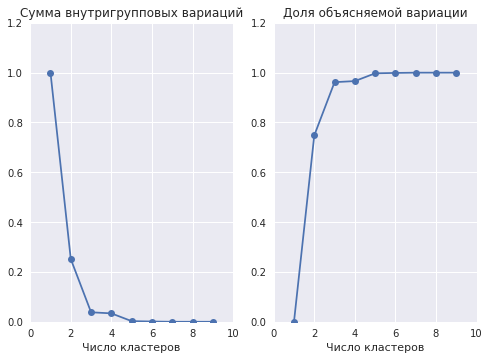

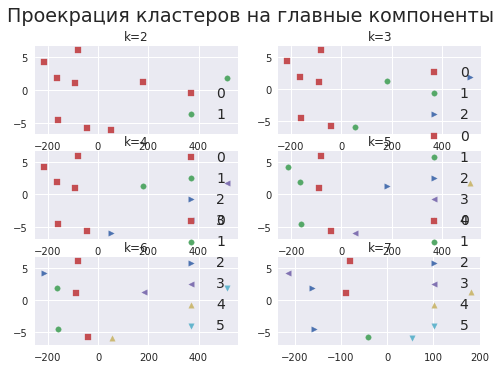

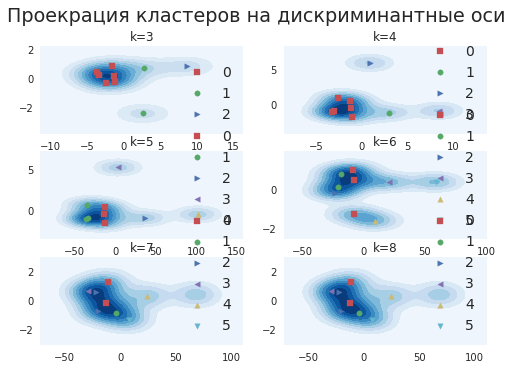

In [180]:
import seaborn as sns; sns.set(color_codes=True)
rcParams['font.family'] = 'DejaVu Sans' 
rcParams['font.size'] = 16
lda = LDA(n_components=2) 
fig = figure()
for k in range(3, 9):
    groups = fcluster(data_linkage, k, criterion='maxclust')
    lda.fit(data_for_clust, groups)
    Xt = lda.transform(data_for_clust) 
    ax = fig.add_subplot(3, 2, k-2)
    for j, m, c in zip(range(k), 'so><^v', 'rgbmyc'):
        ax.scatter(Xt[groups==(j+1), 0], Xt[groups==(j+1), 1], marker=m, s=30, label='%s'%j, facecolors=c, zorder=10)
        sns.kdeplot(Xt[:, 0], Xt[:, 1], shade=True, cmap="Blues")
        ax.set_title('k=%s'%k)
        ax.legend(fontsize=14, loc="lower right")
fig.suptitle(u'Проекрация кластеров на дискриминантные оси')

show()

In [67]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [119]:
clustervar = cluster.copy()
clustervar['Sessions']=preprocessing.scale(clustervar['Sessions'].astype('float64'))
clustervar['BounceRate']=preprocessing.scale(clustervar['BounceRate'].astype('float64'))
clustervar['Goal1Completions']=preprocessing.scale(clustervar['Goal1Completions'].astype('float64'))

In [120]:
(clus_train, clus_test) = train_test_split(clustervar,test_size=.3,random_state=123)

In [115]:
from scipy.spatial.distance import cdist
clusters = range(1,10)
meandist = []

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(clus_train)
    clusassign = model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train,model.cluster_centers_,'euclidean'),axis=1))/clus_train.shape[0])

ValueError: n_samples=6 should be >= n_clusters=7